<a href="https://colab.research.google.com/github/gdebasish11/MalarialCellDetection_CNN/blob/main/MalarialCellDetection_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Datasource: https://lhncbc.nlm.nih.gov/publication/pub9932

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras as tfk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
SIZE = 64
dataset = []  
label = []

In [4]:
## define path for parasitized images
parasitized_images = os.listdir("/content/drive/MyDrive/MalarialCellDetection_CNN/Paratizd_New")

before size 
(142, 163)
after size 
(64, 64)


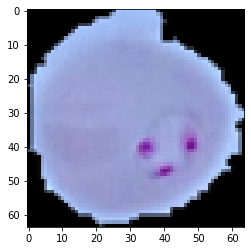

In [5]:
imge1="/content/drive/MyDrive/MalarialCellDetection_CNN/Paratizd_New/C33P1thinF_IMG_20150619_114756a_cell_179.png"
image = cv2.imread(imge1)
img = Image.fromarray(image)
print('before size ')
print(img.size)
img = img.resize((SIZE, SIZE))
print('after size ')
print(img.size)
plt.imshow(img)

In [6]:
for i, image_name in enumerate(parasitized_images):      
    if (image_name.split('.')[1] == 'png' and i<7000):
        image = cv2.imread('/content/drive/MyDrive/MalarialCellDetection_CNN/Paratizd_New/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [7]:
#dataset.shape,label.shape
len(dataset),len(label)

(1188, 1188)

In [8]:
uninfected_images = os.listdir("/content/drive/MyDrive/MalarialCellDetection_CNN/Uninfected_New")

In [9]:
for i, image_name in enumerate(uninfected_images):  
    
    if (image_name.split('.')[1] == 'png' and i<7000):
        image = cv2.imread('/content/drive/MyDrive/MalarialCellDetection_CNN/Uninfected_New/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [10]:
len(dataset),len(label)

(2299, 2299)

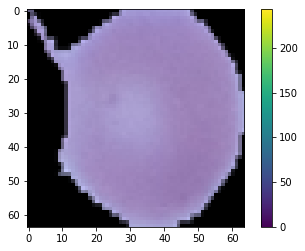

In [11]:
##  see one image
plt.figure()
plt.imshow(dataset[2000])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:

def Toy_ResNet():
  SHAPE=64
  i
  x=tf.keras.layers.Conv2D(32,3,activation="relu")(inputs)
  x=tf.keras.layers.Conv2D(64,3,activation="relu")(x)
  Block1_Output=tf.keras.layers.MaxPooling2D(3)(x)

  x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(Block1_Output)
  x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  Block2_Output = tf.keras.layers.add([x, Block1_Output])

  x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(Block2_Output)
  x = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  Block3_Output = tf.keras.layers.add([x, Block2_Output])

  x = tf.keras.layers.Conv2D(64, 3, activation='relu')(Block3_Output)
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(256, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  outputs = tf.keras.layers.Dense(2,activation='sigmoid')(x)

  model=tf.keras.Model(inputs,outputs,name='MalariaCell')
  return model

In [13]:
## ***********define identity block for Resnet 34*********
# def identity_block(x,filters):
#   x_skip=x
#   # Layer 1
#   x=tf.keras.layers.Conv2D(filters,(3,3),padding='same')(x)
#   x=tf.keras.layers.BatchNormalization(axis=3)(x)
#   x=tf.keras.layers.Activation('relu')(x)

#   # Layer 2
#   x=tf.keras.layers.Conv2D(filters,(3,3),padding='same')(x)
#   x=tf.keras.layers.BatchNormalization(axis=3)(x)

#   ## skip connection
#   x=tf.keras.layers.Add()([x,x_skip])

#   x=tf.keras.layers.Activation('relu')(x)
#   return x

In [14]:
## ***********define convolution block Resnet_34*********
# def convolution_block(x,filters):
#   x_skip=x
#   # Layer 1
#   x=tf.keras.layers.Conv2D(filters,(3,3),padding='same')(x)
#   x=tf.keras.layers.BatchNormalization(axis=3)(x)
#   x=tf.keras.layers.Activation('relu')(x)

#   # Layer 2
#   x=tf.keras.layers.Conv2D(filters,(3,3),padding='same')(x)
#   x=tf.keras.layers.BatchNormalization(axis=3)(x)

#   ## convolution layer
#   x_skip=tf.keras.layers.Conv2D(filters,(1,1), strides = (2,2))(x_skip)

#   ## skip connection
#   x=tf.keras.layers.Add()([x,x_skip])

#   x=tf.keras.layers.Activation('relu')(x)
#   return x

In [15]:
## ***********define identity block for Resnet 50*********

def identity_block_Resnet50(x,filters):  
    F1,F2,F3=filters  ## F1=64,F2=64,F3=256 for first block ,F1=128,F2=128,F3=512 for 2nd block
    x_skip=x
    #Layer 1
    x=tf.keras.layers.Conv2D(filters=F1,kernel_size=(1,1),padding='valid',strides=(1,1))(x)
    x=tf.keras.layers.BatchNormalization(axis=3)(x)
    x=tf.keras.layers.Activation('relu')(x)
    #Layer 2
    x=tf.keras.layers.Conv2D(filters=F2,kernel_size=(3,3),padding='same',strides=(1,1))(x)
    x=tf.keras.layers.BatchNormalization(axis=3)(x)
    x=tf.keras.layers.Activation('relu')(x)
    #Layer 3
    x=tf.keras.layers.Conv2D(filters=F3,kernel_size=(1,1),padding='valid',strides=(1,1))(x)
    x=tf.keras.layers.BatchNormalization(axis=3)(x)
    print('before add')
    x=tf.keras.layers.Add()([x,x_skip])
    print('after add')
    x=tf.keras.layers.Activation('relu')(x)
    return x
  

In [16]:
## ***********define convolution block Resnet_50*********
def convolution_block_Resnet_50(x,filters,s=2):
    F1,F2,F3=filters  ## F1=64,F2=64,F3=256 for first block ,F1=128,F2=128,F3=512 for 2nd block
    x_skip=x
    #Layer 1
    x=tf.keras.layers.Conv2D(filters=F1,kernel_size=(1,1),padding='valid',strides=(s,s))(x)
    x=tf.keras.layers.BatchNormalization(axis=3)(x)
    x=tf.keras.layers.Activation('relu')(x)
    #Layer 2
    x=tf.keras.layers.Conv2D(filters=F2,kernel_size=(3,3),padding='same',strides=(1,1))(x)
    x=tf.keras.layers.BatchNormalization(axis=3)(x)
    x=tf.keras.layers.Activation('relu')(x)
    #Layer 3
    x=tf.keras.layers.Conv2D(filters=F3,kernel_size=(1,1),padding='valid',strides=(1,1))(x)
    x=tf.keras.layers.BatchNormalization(axis=3)(x)
    x=tf.keras.layers.Activation('relu')(x)
    #Add convolution to x_skip 
    x_skip=tf.keras.layers.Conv2D(filters=F3, kernel_size=(1,1), strides = (2,2))(x_skip)
    x_skip=tf.keras.layers.BatchNormalization(axis=3)(x_skip) 
    ## skip connection
    x=tf.keras.layers.Add()([x,x_skip])

    x=tf.keras.layers.Activation('relu')(x)
    return x
  


In [17]:
#***********Define Resnet50 main block*********
def Resnet_50_Custom(classes=2):
  try:
    SHAPE=64
    x_inputs=tf.keras.Input(shape=(SHAPE,SHAPE,3),name="input_image")
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_inputs)

    # (Initial Conv layer along with maxPool)
    x=tf.keras.layers.Conv2D(64,(7,7),padding='same',strides=2)(x)
    x=tf.keras.layers.BatchNormalization(axis=3)(x)
    x=tf.keras.layers.Activation('relu')(x)
    x=tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    print(x.shape)
    x = tf.keras.layers.Conv2D(64, (1, 1), strides = (2,2))(x)
    x = tf.keras.layers.Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = tf.keras.layers.Conv2D(256, (1, 1), strides = (1,1))(x)

    # Define size of sub-blocks and initial filter size
    block_sizes=[3,4,6,3]
    fiter_num=64

    # Add the Resnet Blocks
    for i in range(4):
      if i==0:
      # For sub-block 1 Convolutional block not needed
        for j in range(block_sizes[i]):
          #x=identity_block(x,fiter_num) ## For Resnet34
          x=identity_block_Resnet50(x,filters=(64,64,256)) ## For Resnet50
      else:
        # One Convolutional Block followed by Identity blocks
        # The filter size will go on increasing by a factor of 2
        fiter_num=fiter_num*2
        x=convolution_block_Resnet_50(x,filters=(fiter_num,fiter_num,fiter_num*4))
        for j in range(block_sizes[i]-1):
          #x=identity_block(x,fiter_num) ## For Resnet34
          x=identity_block_Resnet50(x,filters=(fiter_num,fiter_num,fiter_num*4)) ## For Resnet50

    # Dense Network
      x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
      x = tf.keras.layers.Flatten()(x)
      x = tf.keras.layers.Dense(512, activation = 'relu')(x)
      x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
      model = tf.keras.models.Model(inputs = x_inputs, outputs = x, name = "ResNet_50_Custom")
      return model
  except:
    raise Exception()

In [ ]:
model_toy = Resnet_50_Custom();

model_toy.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model_toy.summary();


In [ ]:
# summarize the model
from tensorflow.keras.utils import plot_model

plot_model(model_toy, 'model.png', show_shapes=True)

In [18]:
# 1. Training data: 80%
# 2. Testing data: 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, tfk.utils.to_categorical(np.array(label)), test_size = 0.1, random_state = 0)

In [37]:
np.array(X_train).shape,y_train.shape

((2069, 64, 64, 3), (2069, 2))

In [47]:
## Define image generator augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

batch_size=16

datagen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='constant'
)

In [59]:
#datagen.fit(np.array(X_train))

training_generator=datagen.flow(np.array(X_train),y=None,batch_size=32,subset='training',seed=7)
validation_generator=datagen.flow(np.array(X_train),y=None,batch_size=32,subset='validation',seed=7)

In [ ]:
#model_toy.fit_generator(training_generator,validation_generator  ,steps_per_epoch=len(X_train)/32,epochs=100)

history = model_toy.fit_generator(training_generator,steps_per_epoch=(len(X_train)*0.8)//64, epochs=10, validation_data=validation_generator, validation_steps=(len(X_train)*0.2)//64)

In [ ]:
epochs=100
for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(np.array(X_train), y_train, batch_size=32):
        model_toy.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(X_train) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

In [29]:
train_dataset=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/MalarialCellDetection_CNN/train_images',
    batch_size=batch_size,
    class_mode='binary'
)

Found 2299 images belonging to 2 classes.


In [ ]:
# model_toy.fit(np.array(X_train), y_train,
# #model_toy.fit(np.array(dataset), tfk.utils.to_categorical(np.array(label)),
#           batch_size=400,          epochs=500,
#          validation_split=0.3)   ###convert X_train to numpy array 1st

In [24]:
print("Test_Accuracy: {:.2f}%".format(model_toy.evaluate(np.array(X_test), np.array(y_test))[1]*100))

8/8 [==============================] - 0s 11ms/step - loss: 0.1999 - accuracy: 0.9609
Test_Accuracy: 96.09%
